In [1]:
%matplotlib inline
import lightkurve as lk
from pycheops.models import TransitModel1Spot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# See Deming et al. Fig. 2
BJD_T0 = 2454605.89155  
P = 4.8878018
W = 0.02

ORBIT = 74

In [3]:
# Using SAP_FLUX data because PDCSAP_FLUX data show wierd ripples of ~hour timescale.
lc = lk.search_lightcurve('HAT-P-11',quarter=1,exptime=60).download(flux_column='sap_flux').remove_nans()
tmid = BJD_T0 - 2454833 + P*ORBIT
m = abs(lc.time.value - tmid) < 0.1
lc = lc[m]
lc /= np.median(lc.flux.value[abs(lc.time.value - tmid) > W*P/2])
#ax = lc.scatter()
#ax.axvline(tmid+W*P/2,c='k',alpha=0.5,ls='--')
#ax.axvline(tmid-W*P/2,c='k',alpha=0.5,ls='--')
#ax.axhline(1,c='k',alpha=0.5);


In [13]:
model = TransitModel1Spot()
pars = model.make_params(T_0 = 0, P=P, D=0.004, W=W, t1 = 134.575-tmid, w1 = 0.004)
pars['T_0'].min = -0.1
pars['T_0'].max = +0.1
pars['P'].vary = False
pars['h_1'].vary = True

time = np.array(lc.time.value) - tmid
flux = np.array(lc.flux.value)
flux_err = np.array(lc.flux_err.value)*np.sqrt(1.318)   # Errors scaled to get reduced chi-squared =~ 1
result = model.fit(flux, t=time, params=pars, weights=1/flux_err)

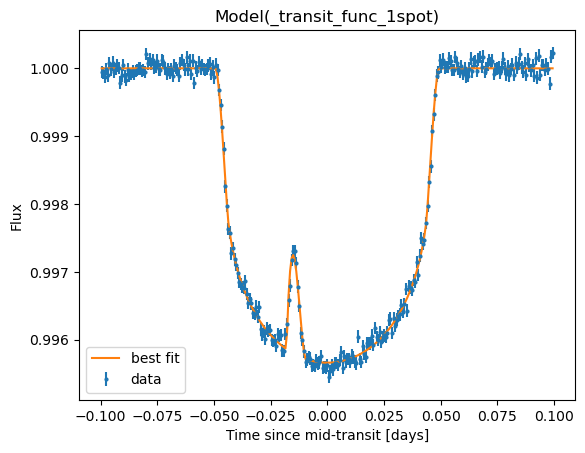

In [14]:
result.plot_fit(xlabel='Time since mid-transit [days]', ylabel='Flux', data_kws={'ms':2});

In [15]:
result